<a href="https://colab.research.google.com/github/sbalram123/CoronaBatch-Session4/blob/master/SB_May_2_830PM_CoronaBatch_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Target : 
# 99.4% (this must be consistently shown in your last few epochs, and not a one-time achievement)
# Less than or equal to 15 Epochs
# Less than 10000 Parameters

# Use LR Scheduler to achieve consistent accuracy above 99.4

# Result :
# Parameters: 9,994 Parameters
# Best Train Accuracy: 98.52 (epoch 13)
# Best Test Accuracy: 99.47 (epoch 11)


# Analysis : Changed Batchsize back to 128 with no loss of accuracy 
#            Used LR of 0.05 with gamma = 0.1 and step size of 6 
#            Acheived 99.4 accuracy conssitently from Epoch 7 . 

In [0]:
# The gods
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                       transforms.RandomRotation((-6.2, 6.2), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [0]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [0]:
dropout = 0.09
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 10, 3,bias=False),
                                   nn.ReLU(),
                                   nn.BatchNorm2d(10),
                                   nn.Dropout2d(dropout),
                                   
                                   nn.Conv2d(10, 20, 3,bias=False),
                                   nn.ReLU(),
                                   nn.BatchNorm2d(20),
                                   nn.Dropout2d(dropout),

                                   nn.Conv2d(20, 10, 1,bias=False),

                                   nn.MaxPool2d(2, 2),

                                   nn.Conv2d(10, 20, 3,bias=False),
                                   nn.ReLU(),
                                   nn.BatchNorm2d(20),
                                   nn.Dropout2d(dropout),

                                   nn.Conv2d(20, 16, 3,bias=False),
                                   nn.ReLU(),
                                   nn.BatchNorm2d(16),
                                   nn.Dropout2d(dropout),
                                   
                                   nn.Conv2d(16, 10, 3,bias=False),
                                   nn.ReLU(),
                                   nn.BatchNorm2d(10),
                                   nn.Dropout2d(dropout),

                                   nn.Conv2d(10, 16, 3,padding =1,bias=False),
                                   nn.ReLU(),
                                   nn.BatchNorm2d(16),
                                   nn.Dropout2d(dropout),
                                   
                                   nn.AvgPool2d(kernel_size=6),
                                   nn.Conv2d(16, 10, 1,bias=False))

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(-1, 10)
        return F.log_softmax(x)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
         Dropout2d-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 20, 24, 24]           1,800
              ReLU-6           [-1, 20, 24, 24]               0
       BatchNorm2d-7           [-1, 20, 24, 24]              40
         Dropout2d-8           [-1, 20, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             200
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 20, 10, 10]           1,800
             ReLU-12           [-1, 20, 10, 10]               0
      BatchNorm2d-13           [-1, 20, 10, 10]              40
        Dropout2d-14           [-1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


kernal	padding	stepsize	nin	nout	rout	jout
0	0	0		0	28	1	1
3	0	1		28	26	3	1
3	0	1		26	24	5	1
1	0	1		24	24	5	1
2	0	2		24	12	6	1
3	0	1		12	10	10	2
3	0	1		10	8	14	2
3	0	1		8	6	18	2
3	1	1		6	6	22	2
6	0	6		6	1	28	2
1	0	1		1	1	28	12

In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch, loss_type):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    
    if loss_type == 'None':
      loss = loss
    
    elif loss_type == 'L1':
      print('L1')
      # Calculate loss
      l1_crit = nn.L1Loss(size_average=False)
      reg_loss = 0
      for param in model.parameters():
        reg_loss += l1_crit(param)
        factor = 0.0005
        print(loss)
        loss += factor * reg_loss
        
    elif loss_type == 'L2':
      loss = loss
      
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=0.25414255261421204 Batch_id=468 Accuracy=88.71: 100%|██████████| 469/469 [00:11<00:00, 39.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0732, Accuracy: 9779/10000 (97.79%)

EPOCH: 1


Loss=0.08177503943443298 Batch_id=468 Accuracy=96.06: 100%|██████████| 469/469 [00:12<00:00, 38.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0535, Accuracy: 9841/10000 (98.41%)

EPOCH: 2


Loss=0.1696828007698059 Batch_id=468 Accuracy=96.61: 100%|██████████| 469/469 [00:12<00:00, 38.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0398, Accuracy: 9881/10000 (98.81%)

EPOCH: 3


Loss=0.12476976960897446 Batch_id=468 Accuracy=96.79: 100%|██████████| 469/469 [00:12<00:00, 38.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0449, Accuracy: 9863/10000 (98.63%)

EPOCH: 4


Loss=0.10595176368951797 Batch_id=468 Accuracy=96.94: 100%|██████████| 469/469 [00:12<00:00, 38.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0467, Accuracy: 9858/10000 (98.58%)

EPOCH: 5


Loss=0.0626276507973671 Batch_id=468 Accuracy=97.06: 100%|██████████| 469/469 [00:12<00:00, 38.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0485, Accuracy: 9851/10000 (98.51%)

EPOCH: 6


Loss=0.08953533321619034 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:11<00:00, 39.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9928/10000 (99.28%)

EPOCH: 7


Loss=0.03492200747132301 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:11<00:00, 39.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9925/10000 (99.25%)

EPOCH: 8


Loss=0.04383504390716553 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:12<00:00, 38.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9926/10000 (99.26%)

EPOCH: 9


Loss=0.03821897134184837 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:12<00:00, 39.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9936/10000 (99.36%)

EPOCH: 10


Loss=0.08524969965219498 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:11<00:00, 39.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9931/10000 (99.31%)

EPOCH: 11


Loss=0.07135674357414246 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:12<00:00, 38.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 9928/10000 (99.28%)

EPOCH: 12


Loss=0.07497426122426987 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:11<00:00, 39.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9931/10000 (99.31%)

EPOCH: 13


Loss=0.0350978784263134 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:12<00:00, 38.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9934/10000 (99.34%)

EPOCH: 14


Loss=0.05016303434967995 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:12<00:00, 38.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9937/10000 (99.37%)

EPOCH: 15


Loss=0.0336458757519722 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:12<00:00, 38.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9934/10000 (99.34%)

EPOCH: 16


Loss=0.06827343255281448 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:11<00:00, 39.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9936/10000 (99.36%)

EPOCH: 17


Loss=0.06487388908863068 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:11<00:00, 39.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9935/10000 (99.35%)

EPOCH: 18


Loss=0.04023050144314766 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:11<00:00, 39.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9934/10000 (99.34%)

EPOCH: 19


Loss=0.1111295223236084 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:12<00:00, 39.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9935/10000 (99.35%)

EPOCH: 20


Loss=0.1136222705245018 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:12<00:00, 38.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9931/10000 (99.31%)

EPOCH: 21


Loss=0.08971866220235825 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:11<00:00, 39.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9934/10000 (99.34%)

EPOCH: 22


Loss=0.036808427423238754 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:12<00:00, 38.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9936/10000 (99.36%)

EPOCH: 23


Loss=0.0402350090444088 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:11<00:00, 39.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9937/10000 (99.37%)

EPOCH: 24


Loss=0.14608575403690338 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:12<00:00, 39.04it/s]



Test set: Average loss: 0.0216, Accuracy: 9937/10000 (99.37%)



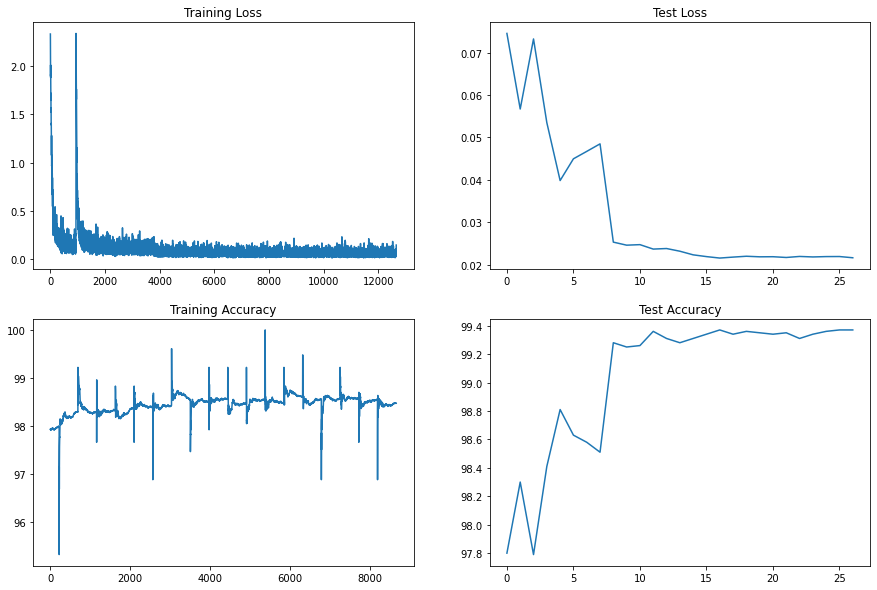

In [0]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)

loss_type_vec = ['None',  'L2']

loss_type = 'None'
#loss_type = 'L1'
loss_type = 'L2'

for loss_type in loss_type_vec:
  if loss_type == 'None':
    #None Loss 
    optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.94)
  #elif loss_type == 'L1':
    #L1 Loss
   # optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.94)
  elif loss_type == 'L2':
    #L2 Loss
    optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.94,dampening=0, weight_decay=0.001, nesterov=False)

    scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

    EPOCHS = 25
    for epoch in range(EPOCHS):
      print("EPOCH:", epoch)
      train(model, device, train_loader, optimizer, epoch, loss_type)
      scheduler.step()
      test(model, device, test_loader)

  


    #%matplotlib inline
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc[4000:])
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")

    

Text(0.5, 1.0, 'Test Accuracy')

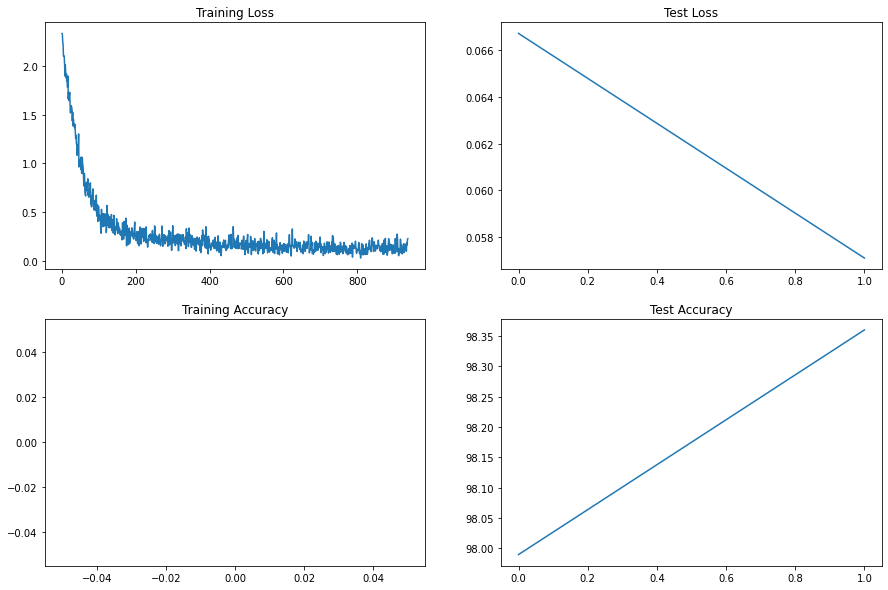

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

